In [1]:

#importing various libraries and modules that are commonly used in machine learning and data analysis tasks.

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#using the `os` module to traverse through a directory and its subdirectories.
# It starts at the directory '/kaggle/input' and iterates through each directory and file within it.
# For each file, it prints the full path by joining the directory name and the file name using `os.path.join()`.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [3]:
X = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")
X.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
X.shape

(10841, 13)

In [5]:
X.nunique(axis = 0)

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [6]:
X[X['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:

X.iloc[10472,1:] = X.iloc[10472,1:].shift(1)
X[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,None,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [8]:
# Counting the number of occurrences of each unique value in the "Category" column of the DataFrame X. 
# The resulting counts are then stored in the variable cat_count. 
# The sort=True parameter sorts the counts in descending order.
cat_count = X.Category.value_counts(sort=True)
cat_count

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [9]:
#The code is creating a new variable `other_val` which contains the values from the `cat_count` variable that are less than 200.
other_val = cat_count[cat_count<200]
X.Category = X.Category.apply(lambda x: "OTHER" if x in other_val else x)
X.Category.value_counts(sort=True)

FAMILY                 1972
OTHER                  1386
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
Name: Category, dtype: int64

In [10]:
X.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [11]:
X.dropna(axis=0,inplace=True)
X.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
# The code is converting the values in the 'Last Updated' column of the DataFrame X into datetime format using the pd.to_datetime() function.
# It then creates two new columns in the DataFrame X called 'year_added' and 'month_added' which contain the year and month values extracted
# from the 'Last Updated' column using the dt.year and dt.month functions.
X["Last Updated"] = pd.to_datetime(X['Last Updated'])
X['year_added']=X['Last Updated'].dt.year
X['month_added']=X['Last Updated'].dt.month

In [13]:

X.Rating = X.Rating.fillna(method = "ffill")
X.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
year_added        0
month_added       0
dtype: int64

In [14]:
X.drop(["App","Genres","Last Updated","Current Ver","Price","Android Ver"], axis=1, inplace=True)
X

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,OTHER,4.1,159,19M,"10,000+",Free,Everyone,2018,1
1,OTHER,3.9,967,14M,"500,000+",Free,Everyone,2018,1
2,OTHER,4.7,87510,8.7M,"5,000,000+",Free,Everyone,2018,8
3,OTHER,4.5,215644,25M,"50,000,000+",Free,Teen,2018,6
4,OTHER,4.3,967,2.8M,"100,000+",Free,Everyone,2018,6
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6M,500+,Free,Everyone,2017,6
10836,FAMILY,4.5,38,53M,"5,000+",Free,Everyone,2017,7
10837,FAMILY,5.0,4,3.6M,100+,Free,Everyone,2018,7
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,Mature 17+,2015,1


In [15]:
X["Content Rating"].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [16]:
# The code is filtering the DataFrame `X` to exclude rows where the "Content Rating" column has values "Adults only 18+" or "Unrated".
# It then counts the number of occurrences of each unique value in the "Content Rating" column.
X = X[X["Content Rating"].isin(["Adults only 18+","Unrated"]) == False]
X["Content Rating"].value_counts()

Everyone        7414
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

In [17]:
# Ver_count = X["Android Ver"].value_counts()
# Ver_count

In [18]:
# other_val = Ver_count[Ver_count<50]
# X.loc["Android Ver"] = X.loc[ : ,"Android Ver"].apply(lambda x: None if x in other_val else x)
# X.dropna(inplace = True)
# X["Android Ver"].value_counts(sort=True)

In [19]:
X.Type.value_counts()

Free    8711
Paid     645
Name: Type, dtype: int64

In [20]:
X = X.replace({"Varies with device" : None})
X

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,OTHER,4.1,159,19M,"10,000+",Free,Everyone,2018,1
1,OTHER,3.9,967,14M,"500,000+",Free,Everyone,2018,1
2,OTHER,4.7,87510,8.7M,"5,000,000+",Free,Everyone,2018,8
3,OTHER,4.5,215644,25M,"50,000,000+",Free,Teen,2018,6
4,OTHER,4.3,967,2.8M,"100,000+",Free,Everyone,2018,6
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6M,500+,Free,Everyone,2017,6
10836,FAMILY,4.5,38,53M,"5,000+",Free,Everyone,2017,7
10837,FAMILY,5.0,4,3.6M,100+,Free,Everyone,2018,7
10839,BOOKS_AND_REFERENCE,4.5,114,None,"1,000+",Free,Mature 17+,2015,1


In [21]:
X.Size.value_counts()

14M     165
12M     161
15M     159
11M     159
13M     157
       ... 
383k      1
454k      1
812k      1
442k      1
619k      1
Name: Size, Length: 412, dtype: int64

In [22]:
# The code is performing some data manipulation on the `X.Size` column.

M = X.Size.apply(lambda x: float(x[:-1],)/1024 if x is not None and x.endswith('k') else x)
k = X.Size.apply(lambda x: float(x[:-1],) if x is not None and x.endswith('M') else x)
X.Size = M.combine(other = k, func = lambda x,y: x if x is not None and type(x) is float else y)

In [23]:
Sizemean = X.Size.mean()
print(Sizemean)
X.Size.fillna(value = Sizemean, inplace = True)
X.isna().sum()

22.972271355347313


Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
year_added        0
month_added       0
dtype: int64

In [24]:
# X["Android Ver"] = X.loc[:,"Android Ver"].apply(lambda x: float(x[:3]) if x is not None else x)
# X["Android Ver"]

In [25]:
# X["Android Ver"].fillna(method = "ffill", inplace = True)
# # # Category_Avg = dict(g.mean(numeric_only=True)["Android Ver"])
# # Category_Avg
# X.isna().sum()

In [26]:
#The code is performing some data cleaning and manipulation on the 'X.Installs' column of a DataFrame called 'X'.
X.Installs = X.Installs.apply(lambda x: x[:-1] if x.endswith("+") else x)
X.Installs = X.Installs.apply(lambda x: x.replace(",","") if x is not None else x)
X.Installs.value_counts()

1000000       1575
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         535
50000          465
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [27]:
# X.Price = X.Price.apply(lambda x: float(x[1:]) if x.startswith("$") else x)
# X.Price.value_counts()

In [28]:
# The code is performing one-hot encoding on the categorical variables 'Category', 'Type', and 'Content Rating' in the DataFrame X.

catgry=pd.get_dummies(X['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(X['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(X['Content Rating'],prefix='cr',drop_first=True)
frames=[X,catgry,typ,cr]
X=pd.concat(frames,axis=1)
X.drop(['Category','Type','Content Rating'],axis=1,inplace=True)
X

,Rating,Reviews,Size,Installs,year_added,month_added,catg_BUSINESS,catg_COMMUNICATION,catg_DATING,catg_FAMILY,...,catg_PRODUCTIVITY,catg_SHOPPING,catg_SOCIAL,catg_SPORTS,catg_TOOLS,catg_TRAVEL_AND_LOCAL,typ_Paid,cr_Everyone 10+,cr_Mature 17+,cr_Teen
0,4.1,159,19.000000,10000,2018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14.000000,500000,2018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.700000,5000000,2018,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25.000000,50000000,2018,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.3,967,2.800000,100000,2018,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,7,2.600000,500,2017,6,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,38,53.000000,5000,2017,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,4,3.600000,100,2018,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,114,22.972271,1000,2015,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
y=X['Rating'].values
y=y.astype('int')
X = X.drop(["Rating"],axis = 1)

In [30]:
X.columns

Index(['Reviews', 'Size', 'Installs', 'year_added', 'month_added',
       'catg_BUSINESS', 'catg_COMMUNICATION', 'catg_DATING', 'catg_FAMILY',
       'catg_FINANCE', 'catg_GAME', 'catg_HEALTH_AND_FITNESS',
       'catg_LIFESTYLE', 'catg_MEDICAL', 'catg_NEWS_AND_MAGAZINES',
       'catg_OTHER', 'catg_PERSONALIZATION', 'catg_PHOTOGRAPHY',
       'catg_PRODUCTIVITY', 'catg_SHOPPING', 'catg_SOCIAL', 'catg_SPORTS',
       'catg_TOOLS', 'catg_TRAVEL_AND_LOCAL', 'typ_Paid', 'cr_Everyone 10+',
       'cr_Mature 17+', 'cr_Teen'],
      dtype='object')

In [31]:

# The code is performing feature scaling on the columns 'Reviews', 'Size', and 'Installs' in the DataFrame X.

scaler = MinMaxScaler(feature_range=(0,1))
L = ['Reviews', 'Size',"Installs"]
X = X.apply(pd.to_numeric)
for col in L:
    scaler.fit(X[[col]])
    X.loc[:,col] = scaler.transform(X[[col]])
X

,Reviews,Size,Installs,year_added,month_added,catg_BUSINESS,catg_COMMUNICATION,catg_DATING,catg_FAMILY,catg_FINANCE,...,catg_PRODUCTIVITY,catg_SHOPPING,catg_SOCIAL,catg_SPORTS,catg_TOOLS,catg_TRAVEL_AND_LOCAL,typ_Paid,cr_Everyone 10+,cr_Mature 17+,cr_Teen
0,2.021538e-06,0.189933,9.999000e-06,2018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.235953e-05,0.139929,4.999990e-04,2018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.119638e-03,0.086924,4.999999e-03,2018,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.759054e-03,0.249938,5.000000e-02,2018,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.235953e-05,0.027919,9.999900e-05,2018,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,7.676727e-08,0.025919,4.990000e-07,2017,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.733982e-07,0.529961,4.999000e-06,2017,7,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10837,3.838364e-08,0.035920,9.900000e-08,2018,7,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10839,1.445784e-06,0.229659,9.990000e-07,2015,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
print(X.shape)
y

(9356, 28)


array([4, 3, 4, ..., 5, 4, 4])

In [33]:
y = y-1
y

array([3, 2, 3, ..., 4, 3, 3])

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,train_size=0.8)

In [35]:
# This code is performing feature scaling using the StandardScaler() function.
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_valid = sc_X.transform(X_valid)
X_test=sc_X.transform(X_test)

In [36]:

model  = XGBClassifier(
    n_estimators = 500,
    learning_rate = 0.05,
     early_stopping_rounds = 100,
    n_jobs = 10,
)
model.fit(
    X_train, y_train,
     eval_set = [(X_valid,y_valid)],
)

[0]	validation_0-mlogloss:1.53684
[1]	validation_0-mlogloss:1.47182
[2]	validation_0-mlogloss:1.41337
[3]	validation_0-mlogloss:1.36037
[4]	validation_0-mlogloss:1.31128
[5]	validation_0-mlogloss:1.26677
[6]	validation_0-mlogloss:1.22518
[7]	validation_0-mlogloss:1.18671
[8]	validation_0-mlogloss:1.15165
[9]	validation_0-mlogloss:1.11877
[10]	validation_0-mlogloss:1.08845
[11]	validation_0-mlogloss:1.05985
[12]	validation_0-mlogloss:1.03320
[13]	validation_0-mlogloss:1.00833
[14]	validation_0-mlogloss:0.98503
[15]	validation_0-mlogloss:0.96319
[16]	validation_0-mlogloss:0.94271
[17]	validation_0-mlogloss:0.92324
[18]	validation_0-mlogloss:0.90496
[19]	validation_0-mlogloss:0.88790
[20]	validation_0-mlogloss:0.87163
[21]	validation_0-mlogloss:0.85630
[22]	validation_0-mlogloss:0.84179
[23]	validation_0-mlogloss:0.82829
[24]	validation_0-mlogloss:0.81531
[25]	validation_0-mlogloss:0.80323
[26]	validation_0-mlogloss:0.79194
[27]	validation_0-mlogloss:0.78129
[28]	validation_0-mlogloss:0.7

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=10, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [37]:
y_pred_XG = model.score(X_test,y_test)
y_pred_XG

0.7585470085470085

In [38]:
X_copy = X.copy()
y_copy = y.copy()
sc_X=StandardScaler()
X_copy=sc_X.fit_transform(X_copy)

In [39]:
model2 = RandomForestClassifier(bootstrap = True, oob_score = True, n_jobs = 5)
scores2 = cross_val_score(model2,X_copy,y_copy)
y_pred_RF = scores2.mean()
y_pred_RF

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.7333233405053287

In [40]:
model3 = LogisticRegression(random_state=2 , max_iter=2000)
scores3 = cross_val_score(model3,X_copy,y_copy)
y_pred_LR = scores3.mean()
y_pred_LR

0.7520302000392862

In [41]:
model4 = SVC()
scores4 = cross_val_score(model4,X_copy,y_copy)
y_pred_SV = scores4.mean()
y_pred_SV

0.7413406720662199

In [42]:
model5 = GaussianNB()
scores5 = cross_val_score(model5,X_copy,y_copy)
y_pred_NB = scores5.mean()
y_pred_NB

0.23258335731612054

<AxesSubplot: title={'center': 'Model accuracy'}>

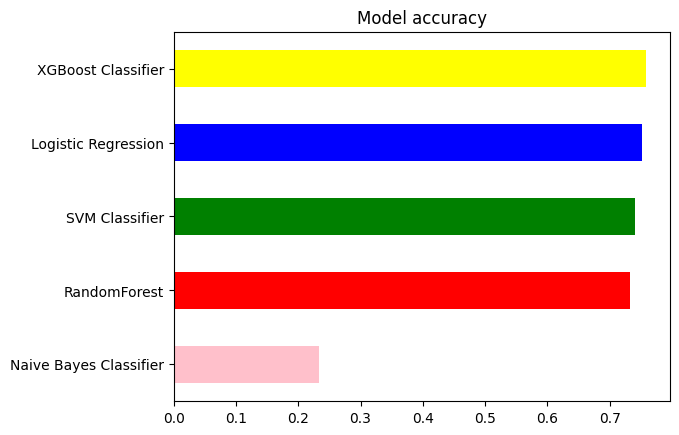

In [43]:
# The code is creating a pandas Series object called `model_acc` which contains the accuracy scores of different machine learning models.
# The accuracy scores are stored in a list `[y_pred_XG, y_pred_RF, y_pred_LR, y_pred_SV, y_pred_NB]` and 
# the corresponding model names are stored in another list `['XGBoost Classifier', 'RandomForest', 'Logistic Regression', 'SVM Classifier', 'Naive Bayes Classifier']`.
model_acc = pd.Series(
    data=[y_pred_XG,y_pred_RF,y_pred_LR,y_pred_SV,y_pred_NB], 
    index=['XGBoost Classifier','RandomForest','Logistic Regression','SVM Classifier','Naive Bayes Classifier']
)
plt.title('Model accuracy')
model_acc.sort_values().plot.barh(color=['pink', 'red', 'green', 'blue', 'yellow'])